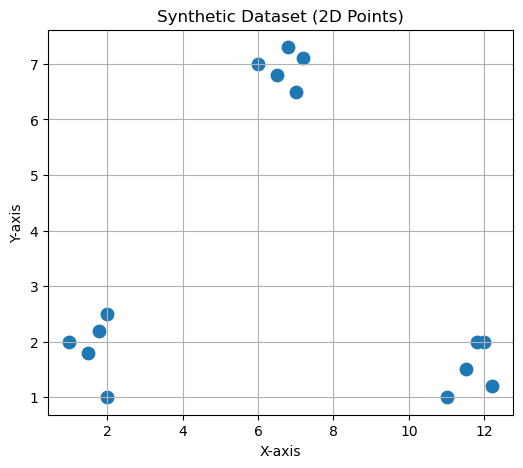

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


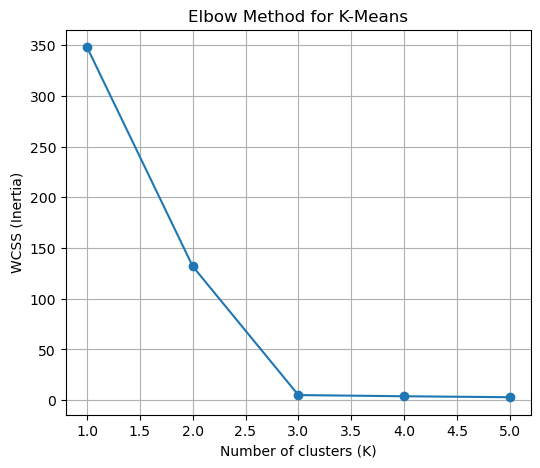

WCSS values: [348.11333333333334, 131.964, 4.9559999999999995, 3.7989999999999995, 2.843666666666666]

How to choose K:
Pick the K where the curve starts flattening (the 'elbow').

K-Means Labels:
Point [1. 2.] -> Cluster 2
Point [2. 1.] -> Cluster 2
Point [1.5 1.8] -> Cluster 2
Point [2.  2.5] -> Cluster 2
Point [1.8 2.2] -> Cluster 2
Point [6. 7.] -> Cluster 0
Point [7.  6.5] -> Cluster 0
Point [6.5 6.8] -> Cluster 0
Point [7.2 7.1] -> Cluster 0
Point [6.8 7.3] -> Cluster 0
Point [11.  1.] -> Cluster 1
Point [12.  2.] -> Cluster 1
Point [11.5  1.5] -> Cluster 1
Point [12.2  1.2] -> Cluster 1
Point [11.8  2. ] -> Cluster 1


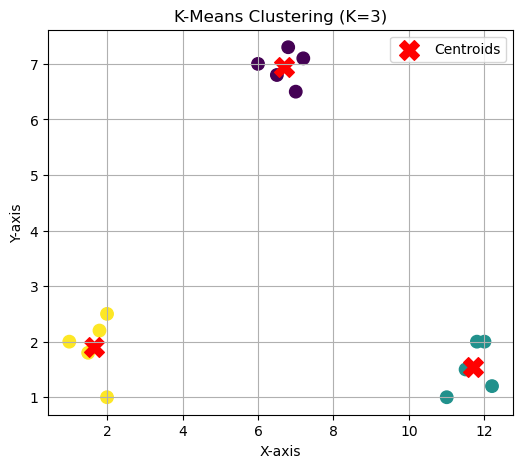

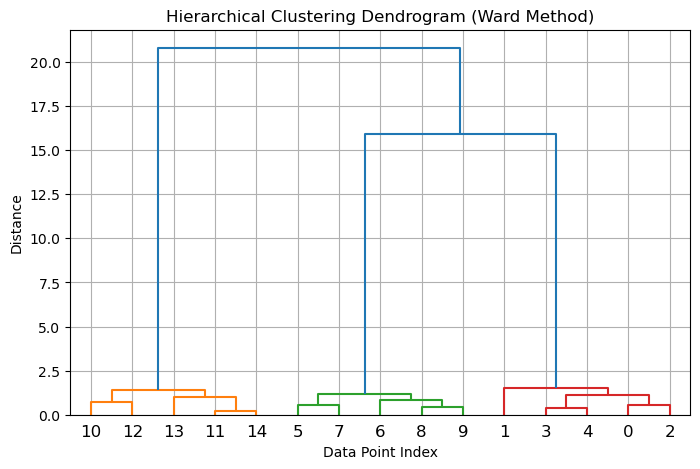

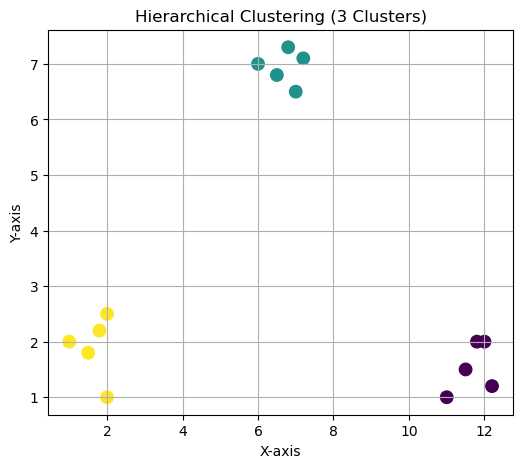


Hierarchical Labels:
Point [1. 2.] -> Cluster 3
Point [2. 1.] -> Cluster 3
Point [1.5 1.8] -> Cluster 3
Point [2.  2.5] -> Cluster 3
Point [1.8 2.2] -> Cluster 3
Point [6. 7.] -> Cluster 2
Point [7.  6.5] -> Cluster 2
Point [6.5 6.8] -> Cluster 2
Point [7.2 7.1] -> Cluster 2
Point [6.8 7.3] -> Cluster 2
Point [11.  1.] -> Cluster 1
Point [12.  2.] -> Cluster 1
Point [11.5  1.5] -> Cluster 1
Point [12.2  1.2] -> Cluster 1
Point [11.8  2. ] -> Cluster 1

DBSCAN Labels (-1 means noise):
Point [1. 2.] -> Label 0
Point [2. 1.] -> Label 0
Point [1.5 1.8] -> Label 0
Point [2.  2.5] -> Label 0
Point [1.8 2.2] -> Label 0
Point [6. 7.] -> Label 1
Point [7.  6.5] -> Label 1
Point [6.5 6.8] -> Label 1
Point [7.2 7.1] -> Label 1
Point [6.8 7.3] -> Label 1
Point [11.  1.] -> Label 2
Point [12.  2.] -> Label 2
Point [11.5  1.5] -> Label 2
Point [12.2  1.2] -> Label 2
Point [11.8  2. ] -> Label 2


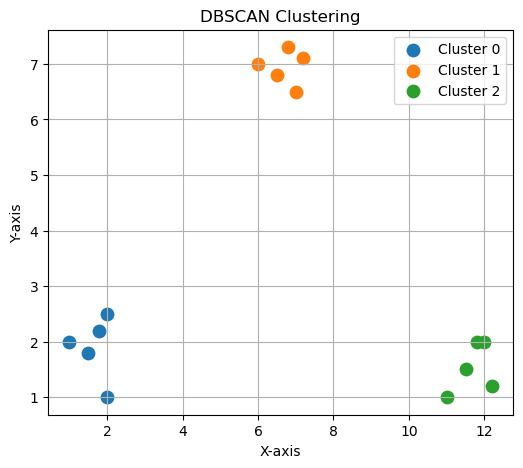


--- Observations & Comparison ---

1) K-Means:
- Strength: Fast, simple, works well when clusters are spherical and well-separated.
- Limitation: Must choose K beforehand; struggles with non-spherical clusters and noise/outliers.
- Best use: Large datasets with roughly circular clusters.

2) Hierarchical (Ward):
- Strength: No need to pre-decide K; dendrogram helps visualize structure.
- Limitation: Slower for large datasets; sensitive to distance metric.
- Best use: Small/medium datasets where interpretability matters.

3) DBSCAN:
- Strength: Finds arbitrary-shaped clusters; automatically detects noise/outliers.
- Limitation: Sensitive to eps/min_samples; struggles when cluster density varies.
- Best use: Data with noise and irregular cluster shapes.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# -------------------------------
# 1) Create a synthetic dataset (10+ 2D points)
# -------------------------------
X = np.array([
    [1, 2], [2, 1], [1.5, 1.8], [2, 2.5], [1.8, 2.2],      # Cluster 1
    [6, 7], [7, 6.5], [6.5, 6.8], [7.2, 7.1], [6.8, 7.3],  # Cluster 2
    [11, 1], [12, 2], [11.5, 1.5], [12.2, 1.2], [11.8, 2]  # Cluster 3
])

# -------------------------------
# 2) Scatter plot of dataset
# -------------------------------
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=80)
plt.title("Synthetic Dataset (2D Points)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


# -------------------------------
# 3) Elbow Method (WCSS for K=1 to 5)
# -------------------------------
wcss = []
K_values = range(1, 6)

for k in K_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)

# -------------------------------
# 4) Plot WCSS vs K
# -------------------------------
plt.figure(figsize=(6, 5))
plt.plot(K_values, wcss, marker="o")
plt.title("Elbow Method for K-Means")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

print("WCSS values:", wcss)
print("\nHow to choose K:")
print("Pick the K where the curve starts flattening (the 'elbow').")


# -------------------------------
# 5) K-Means clustering with 3 clusters
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

print("\nK-Means Labels:")
for i, point in enumerate(X):
    print(f"Point {point} -> Cluster {kmeans_labels[i]}")


# -------------------------------
# 6) Plot K-Means clusters + centroids
# -------------------------------
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, s=80)
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", s=200, marker="X", label="Centroids")
plt.title("K-Means Clustering (K=3)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


# -------------------------------
# 7) Hierarchical clustering linkage (Ward)
# -------------------------------
Z = linkage(X, method="ward")

# -------------------------------
# 8) Plot dendrogram
# -------------------------------
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Ward Method)")
plt.xlabel("Data Point Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


# -------------------------------
# 9) Cut dendrogram to form 3 clusters + visualize
# -------------------------------
hier_labels = fcluster(Z, t=3, criterion="maxclust")

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=hier_labels, s=80)
plt.title("Hierarchical Clustering (3 Clusters)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

print("\nHierarchical Labels:")
for i, point in enumerate(X):
    print(f"Point {point} -> Cluster {hier_labels[i]}")


# -------------------------------
# 10) DBSCAN clustering
# -------------------------------
# eps controls neighborhood radius, min_samples controls density requirement
dbscan = DBSCAN(eps=1.2, min_samples=3)
db_labels = dbscan.fit_predict(X)

print("\nDBSCAN Labels (-1 means noise):")
for i, point in enumerate(X):
    print(f"Point {point} -> Label {db_labels[i]}")


# -------------------------------
# 11) Visualize DBSCAN clusters (show noise)
# -------------------------------
plt.figure(figsize=(6, 5))

unique_labels = set(db_labels)

for label in unique_labels:
    if label == -1:
        # Noise
        plt.scatter(X[db_labels == label, 0], X[db_labels == label, 1],
                    s=100, marker="x", label="Noise")
    else:
        plt.scatter(X[db_labels == label, 0], X[db_labels == label, 1],
                    s=80, label=f"Cluster {label}")

plt.title("DBSCAN Clustering")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()


# -------------------------------
# 12) Observations / Comparison
# -------------------------------
print("\n--- Observations & Comparison ---")

print("\n1) K-Means:")
print("- Strength: Fast, simple, works well when clusters are spherical and well-separated.")
print("- Limitation: Must choose K beforehand; struggles with non-spherical clusters and noise/outliers.")
print("- Best use: Large datasets with roughly circular clusters.")

print("\n2) Hierarchical (Ward):")
print("- Strength: No need to pre-decide K; dendrogram helps visualize structure.")
print("- Limitation: Slower for large datasets; sensitive to distance metric.")
print("- Best use: Small/medium datasets where interpretability matters.")

print("\n3) DBSCAN:")
print("- Strength: Finds arbitrary-shaped clusters; automatically detects noise/outliers.")
print("- Limitation: Sensitive to eps/min_samples; struggles when cluster density varies.")
print("- Best use: Data with noise and irregular cluster shapes.")